# Import the python necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Load the dataset

In [5]:
#Reading the data
data = pd.read_csv("C:/Users/deepa/Downloads/ifood_df (1).csv")

data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# Reviewing data columns and comparing them to the dataset description

In [13]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

# Looking for missing values

In [16]:
data.isna()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

# Checking column types

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

# Assessing unique values

In [24]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [26]:
data.fillna(data.mean(), inplace=True)

In [32]:
for col in ['MntTotal', 'MntRegularProds']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

##  Descriptive Statistics

Let's calculate some basic statistics like the average purchase value and purchase frequency.


In [34]:
# Calculate average purchase value, frequency of purchases, etc.
average_purchase = data['MntTotal'].mean()
purchase_frequency = data['MntRegularProds'].mean()

# Display the results
print(f"Average Purchase Value: ${average_purchase:.2f}")
print(f"Purchase Frequency: {purchase_frequency:.2f}")


Average Purchase Value: $562.60
Purchase Frequency: 518.35


In [49]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

# Data Exploration


## Box plot for the total amount spent on all products (MntTotal)
Our analysis will be focused on total amount spent on all products (MntTotal). Boxplot will help us to find outliers if any.

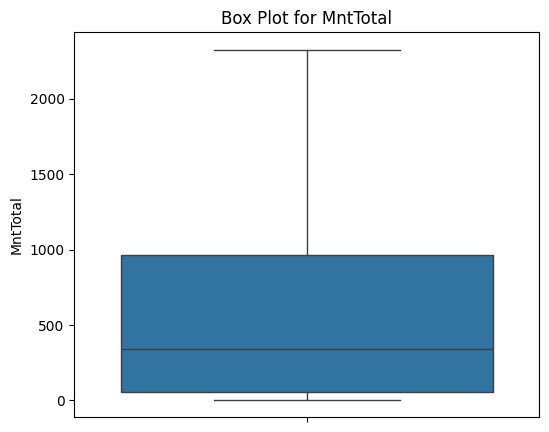

In [68]:
plt.figure(figsize=(6,5))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

## Outliers

In [73]:
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntRegularProds'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
71,75825.0,0,0,40,1032,105,779,137,105,51,...,0,0,0,0,1,0,0,2158.0,2107.0,1
923,94384.0,0,0,62,1111,24,790,160,45,172,...,1,0,0,0,1,0,0,2130.0,1958.0,3
967,75759.0,0,0,46,1394,22,708,89,91,182,...,0,0,0,0,1,0,0,2304.0,2122.0,3
1032,69098.0,0,0,82,1315,22,780,145,0,178,...,0,0,0,0,0,0,1,2262.0,2084.0,0
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2326.0,2147.0,1


## Outliers removal

In [86]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,...,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,51392.586758,0.445205,0.510046,48.979909,300.335616,26.002740,161.178539,37.044292,26.677169,43.589041,...,0.257078,0.034703,0.090411,0.024658,0.504566,0.163927,0.216438,551.238356,507.649315,0.287671
std,20586.514575,0.537716,0.544619,28.973051,330.833274,39.383822,212.475566,54.139503,40.660461,51.378788,...,0.437122,0.183069,0.286835,0.155115,0.500093,0.370294,0.411911,560.663293,539.178844,0.662500
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,34972.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51075.000000,0.000000,0.000000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,339.500000,283.000000,0.000000
75%,67866.250000,1.000000,1.000000,74.000000,496.000000,32.750000,224.000000,49.000000,32.750000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,956.000000,872.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1492.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2105.000000,2092.000000,4.000000


## Box plot and histogram for income

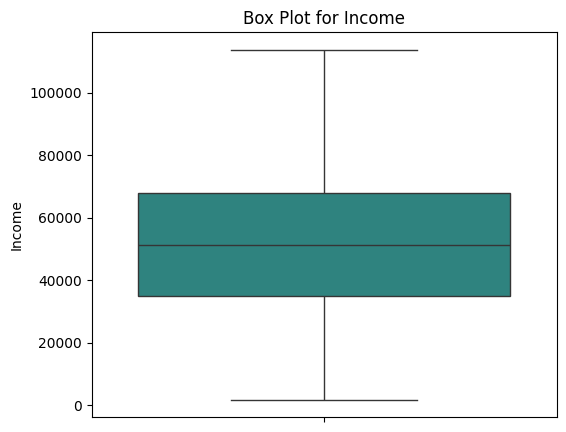

In [91]:
plt.figure(figsize=(6, 5))  
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

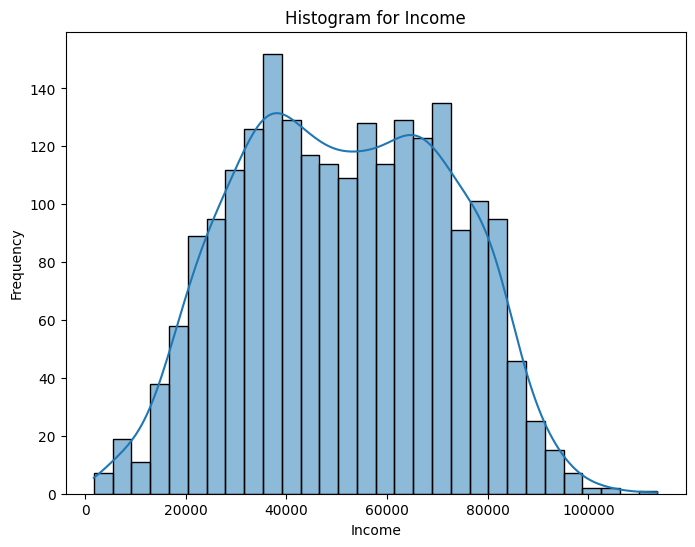

In [93]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

## Histogram for age

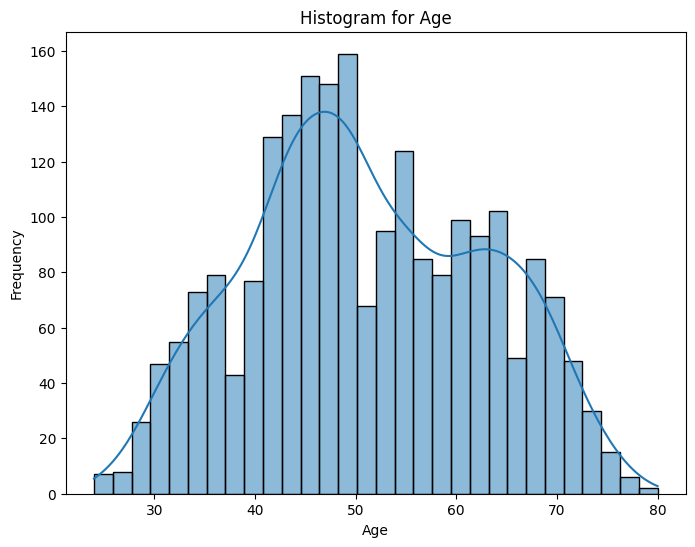

In [96]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Correlation matrix

In [101]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']

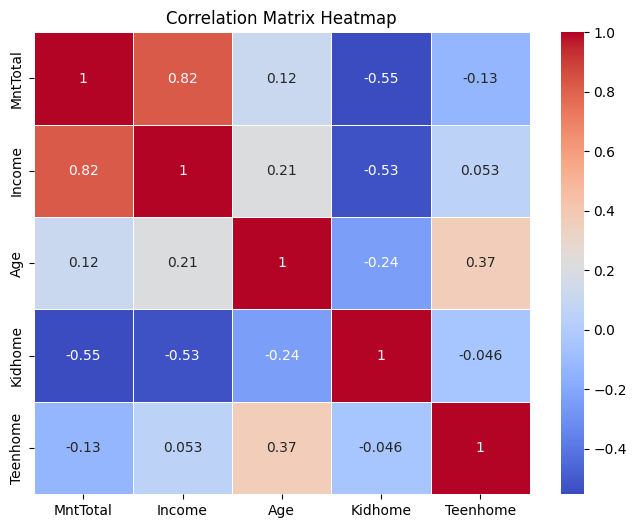

In [107]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Apply K-Means Clustering

In [116]:
from sklearn.preprocessing import StandardScaler

features = data[['MntTotal', 'MntRegularProds']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(scaled_features[:5]) 


[[ 1.74433562  1.7314549 ]
 [-0.94595003 -0.91391166]
 [ 0.32604843  0.34198817]
 [-0.89778178 -0.86196898]
 [-0.25732253 -0.21454055]]


In [133]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head()    

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529.0,1441.0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21.0,15.0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734.0,692.0,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48.0,43.0,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407.0,392.0,0,1


In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.190000e+03,2.190000e+03,2.190000e+03
mean,6.488975e-17,-1.168015e-16,-1.184238e-16
std,1.000228e+00,1.000228e+00,1.000228e+00
min,-2.412935e+00,-9.762782e-01,-1.347186e+00
25%,-7.978202e-01,-8.852937e-01,-1.347186e+00
50%,-1.543046e-02,-3.777431e-01,7.422880e-01
75%,8.003990e-01,7.220984e-01,7.422880e-01
max,3.028956e+00,2.771925e+00,7.422880e-01


# Visualisation of clusters

In [152]:
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']

In [154]:
for col in cols_marital:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')    

0.0109: Point-Biserial Correlation for marital_Divorced with p-value 0.6106
-0.0206: Point-Biserial Correlation for marital_Married with p-value 0.3362
-0.0003: Point-Biserial Correlation for marital_Single with p-value 0.9904
-0.0016: Point-Biserial Correlation for marital_Together with p-value 0.9404
0.0409: Point-Biserial Correlation for marital_Widow with p-value 0.0557


In [156]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)

Text(0, 0.5, 'MntTotal')

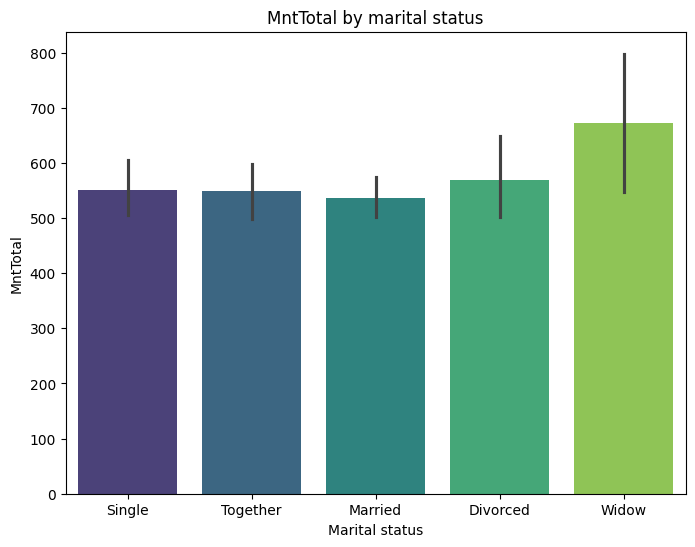

In [158]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

In [160]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head()  

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship,Marital
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529.0,1441.0,0,0,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21.0,15.0,0,0,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734.0,692.0,0,1,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48.0,43.0,0,1,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407.0,392.0,0,1,Married


In [162]:
from sklearn.cluster import KMeans

# Standardising data

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.190000e+03,2.190000e+03,2.190000e+03
mean,6.488975e-17,-1.168015e-16,-1.184238e-16
std,1.000228e+00,1.000228e+00,1.000228e+00
min,-2.412935e+00,-9.762782e-01,-1.347186e+00
25%,-7.978202e-01,-8.852937e-01,-1.347186e+00
50%,-1.543046e-02,-3.777431e-01,7.422880e-01
75%,8.003990e-01,7.220984e-01,7.422880e-01
max,3.028956e+00,2.771925e+00,7.422880e-01
